In [1]:
# Import requirement libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import random
import os

from globals import CLASSES_NAME

In [ ]:
# Define name of images and their annotation bbox
train_images_path = "dataset\\train-images.csv"
train_bbox_path = "dataset\\train-annotations-bbox.csv"

train_images_df = pd.read_csv(train_images_path)
train_bbox_df = pd.read_csv(train_bbox_path)

# Print first 5 of dataframe
print(train_images_df.head())
print(train_bbox_df.head())


In [ ]:
print(train_images_df.columns)
print(np.size(train_images_df))

In [ ]:
# Changing dataframes for comfortable usage
train_images_df = train_images_df[["ImageID"]]
train_bbox_df = train_bbox_df[["ImageID", "LabelName"]]
train_bbox_df.rename(columns={"LabelName": "LabelCode"}, inplace=True)

# Print changed dataframes
print(train_images_df.head())
print(train_bbox_df.head())

In [2]:
class_description_path = "dataset\\class-descriptions.csv"
class_description_df = pd.read_csv(class_description_path)
class_description_df.columns = ["LabelCode", "LabelName"]
class_description_df = class_description_df.loc[class_description_df["LabelName"].isin(CLASSES_NAME), "LabelCode"].tolist()
print(class_description_df)

['/m/015p6', '/m/01dws', '/m/01yrx']


In [42]:
# === Downloading dataset ===
# Creating function for writing to file 10% of images from dataset
def write_data_part_to_file(data_split, classes_name_df, percent_of_data=None):
    """
    Function for creating list of images which will be downloaded and write that to txt file;
    :param data_split: is string value (can be set as 'train', 'test' or 'validation';
    :param percent_of_data: is the decimal value of per cent dataset which will be written to txt file;
    :return: written file with a list of images to be downloaded.
    """

    # Initializing file name for this part of split
    images_name_path = "dataset\\"+data_split+"-images.csv"
    images_bbox_path = "dataset\\"+data_split+"-annotations-bbox.csv"

    # Defining DataFrame for this files
    images_name_df = pd.read_csv(images_name_path, usecols=["ImageID"])
    images_bbox_df = pd.read_csv(images_bbox_path, usecols=["ImageID", "LabelName"])

    # Changing dataframes for comfortable usage
    # images_name_df = images_name_df[["ImageID"]]
    # images_bbox_df = images_bbox_df[["ImageID", "LabelName"]]
    images_bbox_df.rename(columns={"LabelName": "LabelCode"}, inplace=True)

    # Determining which image we need depending on whether our class is there
    images_bbox_df = images_bbox_df.loc[images_bbox_df["LabelCode"].isin(classes_name_df), "ImageID"]
    images_name_df = images_name_df.loc[images_name_df["ImageID"].isin(images_bbox_df.tolist())]
    images_name_df = images_name_df.drop_duplicates()

    # Split dataframe to percent_of_data for downloading not all images
    images_name_list = []
    if percent_of_data is not None:
        images_name_df_index = images_name_df.index.tolist()
        images_name_df_size = np.size(images_name_df_index)
        images_name_df_index = images_name_df_index[:int(images_name_df_size * percent_of_data)]
        images_name_list = images_name_df.loc[images_name_df.index.isin(images_name_df_index), "ImageID"].tolist()

    # Writing list of images names to file
    file_name = "dataset\\images_name_lists\\"+data_split+"_images_list.txt"

    with open(file_name, "w") as file:
        for image_id in images_name_list:
            file.write(f"{data_split}/{image_id}\n")
    print(f"==> {data_split}_list file created! <==")

In [43]:
# Using function for creating images name list file for downloading images
write_data_part_to_file("train", class_description_df, percent_of_data=0.1)
write_data_part_to_file("test", class_description_df, percent_of_data=0.1)
write_data_part_to_file("validation", class_description_df, percent_of_data=1)


Before splitting train size: 31382
Total train size: 3138
Before splitting test size: 2942
Total test size: 294
Before splitting validation size: 958
Total validation size: 958


In [46]:
# Download images with download script from open image dataset site
!python oid_downloader.py "dataset\\images_name_lists\\train_images_list.txt" --download_folder="dataset\\train" --num_processes=5
!python oid_downloader.py "dataset\\images_name_lists\\test_images_list.txt" --download_folder="dataset\\test" --num_processes=5
!python oid_downloader.py "dataset\\images_name_lists\\validation_images_list.txt" --download_folder="dataset\\validation" --num_processes=5


In [60]:
# Making function for viewing a random image
def view_random_image(target_dir):
    # Get a random image path
    random_image = random.sample(os.listdir(target_dir), 1)

    # Read the image and plot it
    image = cv2.imread(target_dir + "\\" + random_image[0], cv2.IMREAD_COLOR)
    # image = cv2.decolor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(random_image)
    plt.axis("off")

    # Show the shape of the image
    print(f"Image shape: {image.shape}")

    plt.show()
    return image

Image shape: (682, 1024, 3)


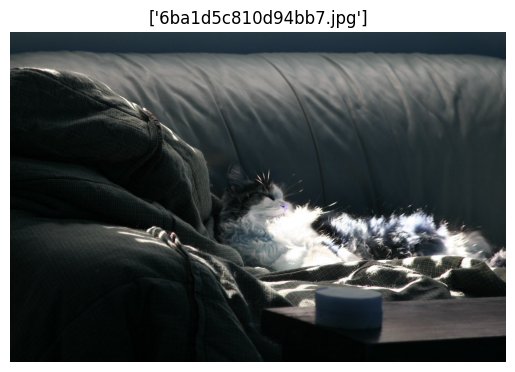

In [61]:
rand_image = view_random_image(target_dir="dataset\\train")

In [62]:
# View image array
rand_image

array([[[37, 51, 57],
        [38, 52, 58],
        [37, 51, 57],
        ...,
        [41, 53, 59],
        [38, 52, 58],
        [37, 51, 57]],

       [[37, 51, 57],
        [38, 52, 58],
        [38, 52, 58],
        ...,
        [41, 53, 59],
        [38, 52, 58],
        [39, 53, 59]],

       [[37, 51, 57],
        [38, 52, 58],
        [38, 52, 58],
        ...,
        [38, 51, 59],
        [38, 51, 59],
        [39, 52, 60]],

       ...,

       [[ 4,  9,  7],
        [ 3,  8,  6],
        [ 2,  7,  5],
        ...,
        [ 1,  5,  6],
        [ 2,  4,  5],
        [ 2,  4,  5]],

       [[ 4,  9,  7],
        [ 4,  9,  7],
        [ 0,  5,  3],
        ...,
        [ 3,  5,  6],
        [ 3,  5,  6],
        [ 3,  5,  6]],

       [[ 4,  9,  7],
        [ 4,  9,  7],
        [ 0,  5,  3],
        ...,
        [ 5,  7,  8],
        [ 5,  7,  8],
        [ 5,  7,  8]]], dtype=uint8)

In [63]:
# Get all the pixel values between 0 & 1 (normalization)
rand_image/255.

array([[[0.14509804, 0.2       , 0.22352941],
        [0.14901961, 0.20392157, 0.22745098],
        [0.14509804, 0.2       , 0.22352941],
        ...,
        [0.16078431, 0.20784314, 0.23137255],
        [0.14901961, 0.20392157, 0.22745098],
        [0.14509804, 0.2       , 0.22352941]],

       [[0.14509804, 0.2       , 0.22352941],
        [0.14901961, 0.20392157, 0.22745098],
        [0.14901961, 0.20392157, 0.22745098],
        ...,
        [0.16078431, 0.20784314, 0.23137255],
        [0.14901961, 0.20392157, 0.22745098],
        [0.15294118, 0.20784314, 0.23137255]],

       [[0.14509804, 0.2       , 0.22352941],
        [0.14901961, 0.20392157, 0.22745098],
        [0.14901961, 0.20392157, 0.22745098],
        ...,
        [0.14901961, 0.2       , 0.23137255],
        [0.14901961, 0.2       , 0.23137255],
        [0.15294118, 0.20392157, 0.23529412]],

       ...,

       [[0.01568627, 0.03529412, 0.02745098],
        [0.01176471, 0.03137255, 0.02352941],
        [0.00784314, 0

In [65]:
# Checking the ground truth CSV file (loading it to DataFrame)
train_ground_truth = pd.read_csv("dataset\\train-annotations-bbox.csv", usecols=["ImageID", "LabelName", "XMin", "XMax", "YMin", "YMax"])
print(train_ground_truth.head())
num_bbox = train_ground_truth.shape[0]
print(num_bbox)

            ImageID  LabelName      XMin      XMax      YMin      YMax
0  000002b66c9c498e  /m/01g317  0.012500  0.195312  0.148438  0.587500
1  000002b66c9c498e  /m/01g317  0.025000  0.276563  0.714063  0.948438
2  000002b66c9c498e  /m/01g317  0.151562  0.310937  0.198437  0.590625
3  000002b66c9c498e  /m/01g317  0.256250  0.429688  0.651563  0.925000
4  000002b66c9c498e  /m/01g317  0.257812  0.346875  0.235938  0.385938
14610229


In [66]:
train_ground_truth.ImageID[3]

'000002b66c9c498e'

In [67]:
train_ground_truth.LabelName[3]

'/m/01g317'

In [74]:
train_ground_truth.loc[3,"XMin":"YMax"]

XMin     0.25625
XMax    0.429688
YMin    0.651563
YMax       0.925
Name: 3, dtype: object